In [2]:
#for linear regression
from sklearn.linear_model import LinearRegression

In [3]:
#for data manipulation
import pandas as pd
import numpy as np

In [6]:
#for plotting graphs
import matplotlib.pyplot as plt
import seaborn

In [7]:
#for importing data 
import fix_yahoo_finance as yf

In [34]:
#read data
#store in dataframe
df = yf.download('GLD', '2008-01-01', '2017-12-31')

[*********************100%***********************]  1 of 1 downloaded


In [35]:
#onyl keep 'Close' columns
df = df[['Close']]

In [36]:
#Drop row with missing columns
df = df.dropna()

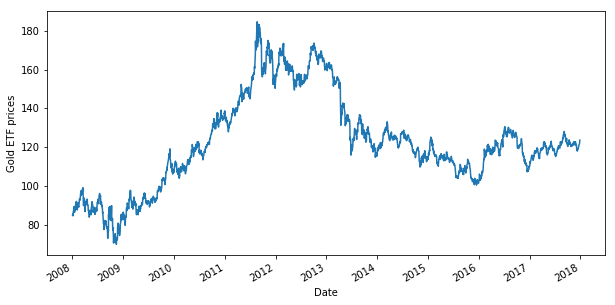

In [37]:
#Plot the crossing price of GLD
df.Close.plot(figsize=(10,5))
plt.ylabel('Gold ETF prices')
plt.show()

In [38]:
df['S_3'] = df['Close'].shift(1).rolling(window=3).mean()
df['S_9'] = df['Close'].shift(1).rolling(window=9).mean()
df = df.dropna()

X = df[['S_3','S_9']]
X.head()

,S_3,S_9
Date,,
2008-01-15,88.790001,86.670000
2008-01-16,88.703334,87.017777
2008-01-17,88.076665,87.143333
2008-01-18,87.063332,87.295555
2008-01-22,86.873332,87.590000


In [39]:
y = df['Close']
y.head()

Date
2008-01-15    87.989998
2008-01-16    86.699997
2008-01-17    86.500000
2008-01-18    87.419998
2008-01-22    88.169998
Name: Close, dtype: float64

In [40]:
split = 0.8
split = int(split*len(df))


In [41]:
#form train dataset
X_train = X[:split]
y_train = y[:split]

#form test dataset
X_test = X[split:]
y_test = y[split:]

In [43]:
linear_regression = LinearRegression().fit(X_train, y_train)

In [49]:
print('Gold ETF price = ', round(linear_regression.coef_[0], 2), \
     '* 3 day MA ', round(linear_regression.coef_[1], 2), \
     '* 9 day MA + ', round(linear_regression.intercept_, 2))

Gold ETF price =  1.19 * 3 day MA  -0.2 * 9 day MA +  0.37


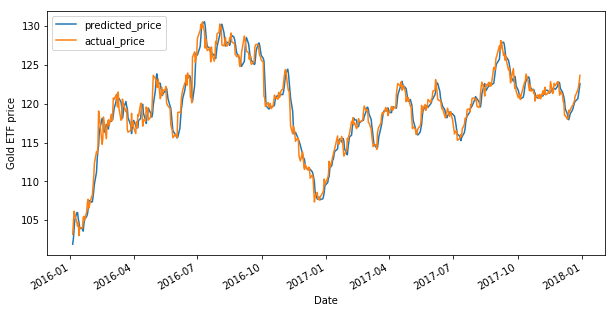

In [51]:
predicted_price = linear_regression.predict(X_test)
predicted_price = pd.DataFrame(predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(10,5))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold ETF price")
plt.show()

In [54]:
r2_score = linear_regression.score(X_test, y_test)*100
float("{0:.2f}".format(r2_score))

94.91